<h1>Vikramaditya Reddy Varkala</h1>
<h2>Z1973679</h2>

<b1><u><b>Question 1:Maximum Combat Power  </b></u></b1>

<b1><u><b>a:Compute Combat Power  </b></u></b1>

In [1]:
import pandas as pd
url="https://faculty.cs.niu.edu/~dakoop/cs503-2023sp/a5/pokemon.json"
df=pd.read_json(url)

In [2]:
def combatpower(x):
    attack=2*((x["attack"]**0.5)*(x["sp_attack"]**0.5)+(x["speed"]**0.5))
    defense=2*((x["defense"]**0.5)*(x["sp_defense"]**0.5)+(x["speed"]**0.5))
    stamina=2*x["hp"]
    max_cp=(attack+15)*((defense+15)**0.5)*((stamina+15)**0.5)*(0.7903001**2)/10
    return max_cp

df["max_cp"]=df.apply(combatpower,axis=1)

# Reference:https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html

In [3]:
print(df.info())
#total 13 columns(max_cp is the new column)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          1028 non-null   object 
 1   generation    1028 non-null   int64  
 2   species       1028 non-null   object 
 3   primary_type  1028 non-null   object 
 4   hp            1028 non-null   int64  
 5   height_m      1028 non-null   float64
 6   weight_kg     1027 non-null   float64
 7   speed         1028 non-null   int64  
 8   attack        1028 non-null   int64  
 9   defense       1028 non-null   int64  
 10  sp_attack     1028 non-null   int64  
 11  sp_defense    1028 non-null   int64  
 12  max_cp        1028 non-null   float64
dtypes: float64(3), int64(7), object(3)
memory usage: 104.5+ KB
None


In [4]:
print(df)

                                name  generation           species  \
0                          Bulbasaur           1      Seed Pokémon   
1                            Ivysaur           1      Seed Pokémon   
2                           Venusaur           1      Seed Pokémon   
3                      Mega Venusaur           1      Seed Pokémon   
4                         Charmander           1    Lizard Pokémon   
...                              ...         ...               ...   
1023     Zacian Hero of Many Battles           8   Warrior Pokémon   
1024        Zamazenta Crowned Shield           8   Warrior Pokémon   
1025  Zamazenta Hero of Many Battles           8   Warrior Pokémon   
1026                       Eternatus           8  Gigantic Pokémon   
1027             Eternatus Eternamax           8  Gigantic Pokémon   

     primary_type   hp  height_m  weight_kg  speed  attack  defense  \
0           Grass   45       0.7        6.9     45      49       49   
1           Grass

<b1><u><b>b:Maximum Combat Power by Generation  </b></u></b1>

In [5]:
#descending order
df1=df.sort_values("max_cp",ascending=False)

#empty list to store pokemons.
list1=[]

for generation in range(1,9):
    gen=df1[df1["generation"]==generation]
    pokemon=gen.drop_duplicates(subset="generation",keep="first")[["name","max_cp"]]
    pokemon["generation"]=generation
    pokemon= pokemon[["generation","name","max_cp"]]
    list1.append(pokemon)
#first pokemon is the highest max_cp pokemon as its sorted in descending order.  
#concatenate to combine dataframes
result=pd.concat(list1,ignore_index=True)
print(result)

#reference:https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html
# https://pandas.pydata.org/docs/reference/api/pandas.concat.html

   generation                    name       max_cp
0           1           Mega Mewtwo X  5513.052355
1           2          Mega Tyranitar  4466.431001
2           3           Mega Rayquaza  5711.216220
3           4           Mega Garchomp  4735.119529
4           5            White Kyurem  4874.258980
5           6  Zygarde Complete Forme  4661.614226
6           7          Ultra Necrozma  5109.115391
7           8     Eternatus Eternamax  9212.708141


<b1><u><b>Question 2:Primary Types and Attack, Defense, & Speed  </b></u></b1>

<b1><u><b>a:Bar Chart</b></u></b1>

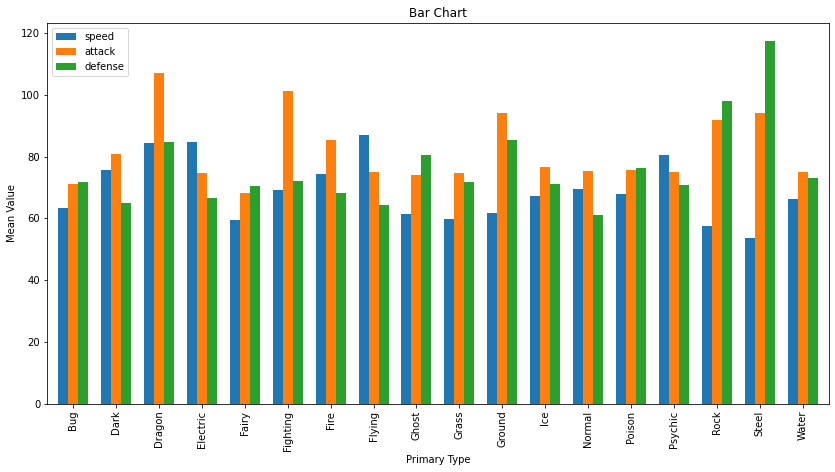

In [6]:
import matplotlib.pyplot as plt

#groupby
g=df.groupby("primary_type")[["speed","attack","defense"]].mean()

#Grouped bar chart
ax= g.plot(kind="bar",width=0.7,figsize=(14,7))
ax.set_xlabel("Primary Type")
ax.set_ylabel("Mean Value")
ax.set_title("Bar Chart")
plt.legend(loc="upper left")
plt.show()

# Reference:https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html

<b1><u><b>b:Scatterplot  </b></u></b1>

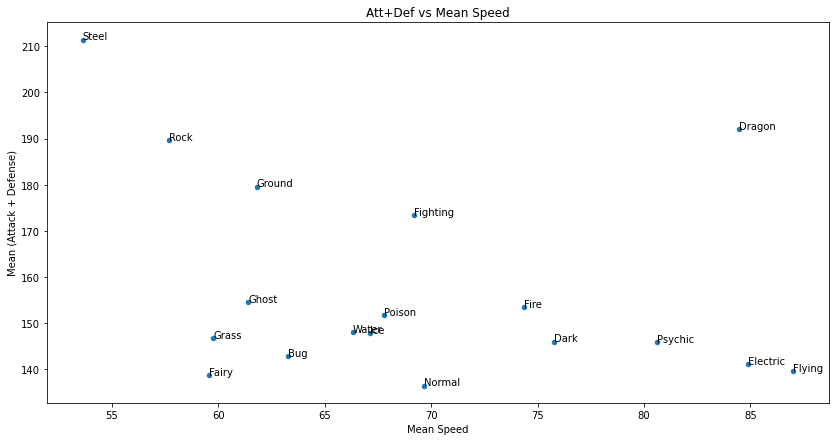

In [7]:
import matplotlib.pyplot as plt

#groupby
g=df.groupby("primary_type").mean()[["attack","defense","speed"]]

# Add a new column to the grouped data frame that contains the sum of attack and defense means
g['sum']=g['attack']+g['defense']

# Create a scatter plot of att_def_sum versus speed
ax=g.plot(kind="scatter",x="speed",y="sum",figsize=(14,7))
ax.set_xlabel("Mean Speed")
ax.set_ylabel("Mean (Attack + Defense)")
ax.set_title("Att+Def vs Mean Speed")

#name of each datapoint
for i,row in g.iterrows():
    ax.text(row["speed"],row["sum"],i)
plt.show()

In [8]:
# Steel type has the highest value for mean(Attack + Defense)  but  low speed 
# so it is  one significant outlier with respect to the negative correlation

<b1><u><b>c:Scatter Matrix  </b></u></b1>

In [9]:
import altair as alt

source=df[["primary_type","attack","defense","speed"]]

# Create the base chart
scattermatrix=alt.Chart(source).mark_circle().encode(
    x=alt.X(alt.repeat("column"),type="quantitative"),
    y=alt.Y(alt.repeat("row"),type="quantitative"),
    color="primary_type",
#colour based on primary type
    tooltip=["primary_type","attack","defense","speed"]
).properties(
    width=300,
    height=300
).repeat(
    row=["speed","attack","defense"],
    column=["speed","attack","defense"]
).interactive()

#print
scattermatrix


# Reference:https://altair-viz.github.io/gallery/scatter_matrix.html

alt.RepeatChart(...)

<b1><u><b>d:Brushing Interaction </b></u></b1>

In [10]:
import altair as alt

source= df[["primary_type","attack","defense","speed"]]

#selection brush
brush=alt.selection(type="interval",resolve="global")

scattermatrix=alt.Chart(source).mark_circle().encode(
    x=alt.X(alt.repeat("column"),type="quantitative"),
    y=alt.Y(alt.repeat('row'),type="quantitative"),
    color=alt.condition(brush,"primary_type",alt.ColorValue("gray")),
    tooltip=["primary_type","speed","attack","defense"]
).add_selection(
    brush
).properties(
    width=300,
    height=300
).repeat(
    row=["speed","attack","defense"],
    column=["speed","attack","defense"]
).interactive()


#print
scattermatrix

# Reference:https://altair-viz.github.io/gallery/scatter_linked_brush.html

alt.RepeatChart(...)

<b1><u><b>Question 3: Attack-Defense Distribution  </b></u></b1>

<b1><u><b>a:Bubble Chart   </b></u></b1>

In [23]:
import altair as alt

# Sorting by generation to avoid earlier gen pokemon hidden behind later gen pokemon.
source=df.sort_values("generation")


chart= alt.Chart(source).encode(
    x=alt.X('attack',type="quantitative",title="Attack"),
    y=alt.Y("defense",type="quantitative",title="Defense"),
    tooltip=["name","attack","defense","speed","generation"]
)

#sized by speed
size=alt.Size("speed",type="quantitative",title="Speed",scale=alt.Scale(range=[100,1500]))

#colored by generation
#using nominal type since question says use a different type(for categorical colour scale).
color=alt.Color("generation",type="nominal",title="Generation",scale=alt.Scale(scheme="category20"))


#bubble chart
bubblechart=chart.mark_circle().encode(size=size,color=color
).properties(
    width=600,
    height=400,
    title="Bubble Chart Att vs Def"
).interactive()

#print
bubblechart

# References:https://vega.github.io/vega/docs/schemes/

alt.Chart(...)

<b1><u><b>b: Binned Scatterplot </b></u></b1>

In [12]:
import altair as alt

source=df[["attack","defense"]]

binnedscatterplot=alt.Chart(source).mark_rect().encode(
    alt.X("attack",type="quantitative", bin=alt.Bin(maxbins=40)),
    alt.Y("defense",type="quantitative", bin=alt.Bin(maxbins=30)),
# 40*30 =1200 bins   
    color=alt.Color("count()",scale=alt.Scale(scheme="category20")),
    tooltip=["count()"]
).properties(
    width=900,
    height=600,
    title="Pokemon Distribution"
).interactive()

# Show the binned scatterplot
binnedscatterplot

# Reference:https://altair-viz.github.io/user_guide/transform/bin.html

alt.Chart(...)